Kernel : base (Python 3.9.7) conda environnement

# I. INSTALLER ENVIRONNEMENT DE TRAVAIL

Installer packages/librairies nécessaires

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
from os import listdir
import missingno as msno
from zipfile import ZipFile
import requests
import math
%matplotlib inline
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from sklearn.metrics import silhouette_score
from matplotlib import offsetbox

from glob import glob
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

import nltk
nltk.download('wordnet')
#w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import nltk
from nltk.corpus import stopwords

from gensim.models.doc2vec import TaggedDocument

import time

0it [00:00, ?it/s]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\denis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# palette
jaune ='#FFCA18'
rouge ='#88001B'
bleu ='#000064'
vert ='#055D00'
pink = '#FC6C85'
choco = '#4b2312'
cyan = '#00FFFF'
orange = '#FF6103'
magenta = '#FF00FF'
pastel = ['#FFE06F','#FF9594','#78CF80','#FFB178','#A7B9FF','#FDE8D8']
pastel2 = [rouge, jaune, bleu, pink, vert, choco, cyan, orange, magenta]

Definir l'environnement de travail

In [3]:
path_to_dir=os.path.abspath(os.getcwd())

Créer un sous-dossier 'images' dans le dossier de travail

In [7]:
directory = 'Images'
images = os.path.join(path_to_dir, directory)

try: 
    os.mkdir(images) 
except OSError as error: 
    print(error)

[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Classifiez_automatiquement_des_biens_de_consommation_Desoubzdanne_Denis\\Images'


# II. TEXT TREATMENTS : Sentence Embedding

## II.A Open csv + customization df

In [8]:
df = pd.read_csv('Flipkart/flipkart_com-ecommerce_sample_1050.csv', sep=',',quotechar='"')

FileNotFoundError: [Errno 2] No such file or directory: 'Flipkart/flipkart_com-ecommerce_sample_1050.csv'

In [ ]:
df.head(5)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [ ]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

/!\ create feature category

In [ ]:
def category(table = df):
    df2 = table.copy()
    df2.insert(5, 'Category', df2['product_category_tree'])
    df2['Category'] = df2['Category'].apply(lambda x : x.split(" >>", 1)[0])
    df2['Category'] = df2['Category'].str.replace('"', '')
    df2['Category'] = df2['Category'].str.replace('[', '')
    return df2

In [ ]:
df2 = category()

In [ ]:
df2.Category.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [ ]:
df2.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'Category', 'pid', 'retail_price',
       'discounted_price', 'image', 'is_FK_Advantage_product', 'description',
       'product_rating', 'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

/!\ Remove useless columns

In [ ]:
to_keep = [df2.columns[5], df2.columns[11]]

In [ ]:
df3 = df2.drop(columns=[ele for ele in df2.columns if ele not in to_keep])

In [ ]:
df3.head(2)

Category                                        description
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...

In [ ]:
df3.shape #verification

(1050, 2)

## II.B Tokenization, stopwords & lemmatization

Tokenization

In [ ]:
df3['Token'] = df3['description'].apply(lambda x : x.lower())
df3['Token'] = df3['Token'].apply(lambda x : nltk.RegexpTokenizer(r'\w+').tokenize(x))

Stopwords

In [ ]:
stop_words = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

add int tokens in stopwords

In [ ]:
adds = []
for i in range(0, 1001):
    j = str(i)
    adds.append(j)

In [ ]:
for elt in adds:
    stop_words.append(elt)

In [ ]:
def stop(Token):
    filtered = []
    for elt in Token:
        if elt not in stop_words and len(elt) > 2:
            filtered.append(elt)
    return filtered

In [ ]:
df3['Stop'] = df3.Token.apply(lambda x : stop(x))

In [ ]:
df3.head(3)

Category                                        description  \
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...   
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...   
2        Baby Care  Key Features of Eurospa Cotton Terry Face Towe...   

                                               Token  \
0  [key, features, of, elegance, polyester, multi...   
1  [specifications, of, sathiyas, cotton, bath, t...   
2  [key, features, of, eurospa, cotton, terry, fa...   

                                                Stop  
0  [key, features, elegance, polyester, multicolo...  
1  [specifications, sathiyas, cotton, bath, towel...  
2  [key, features, eurospa, cotton, terry, face, ...

In [ ]:
df3.Stop[0]

['key',
 'features',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhances',
 'look',
 'interiors',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'features',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'makes',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'designs',
 'surreal',
 'attention',
 'sure',
 'steal',
 'hearts',
 'contemporary',
 'eyelet',
 'valance',
 'curtains',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'rays',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'special',
 'moments',
 'joyous',
 'beau

### /!\ Viz most frequent tokens


In [ ]:
df3.columns

Index(['Category', 'description', 'Token', 'Stop'], dtype='object')

In [ ]:
def most_freq_tokens(table = df3, feature = 'Stop', number=50, y='Freq%'): #y=Presence or Frequence
    dico = {}
    for elt in table[feature]:
        for elt2 in elt:
            if elt2 not in dico:
                dico[elt2] = 1
            else:
                dico[elt2] += 1
    dico2 = dico.copy()
    for elt in dico2:
        dico2[elt] = 0
    for elt in dico2:
        for elt2 in table[feature]:
            if elt in elt2:
                dico2[elt] += 1
            else:
                None
    df = pd.DataFrame(dico.keys())
    df.columns = [feature]
    df.insert(1, 'Presence', dico.values())
    df.insert(2, 'Frequence', dico2.values())
    df.insert(3, 'Freq%', round(df.Frequence/len(table)*100, 2))
    df2 = df.sort_values(y, ascending=False)
    plt.figure(figsize=(15,10))
    fig = sns.barplot(data=df2.iloc[:number,:], x=feature, 
                y=y).set_title(f'Barplot ({y}) of tokens from list {feature}', fontsize = 24, pad = 35, fontweight = 'bold')
    plt.xlabel('Tokens', fontsize = 20, fontweight = 'bold')
    plt.ylabel(f'{y}', fontsize = 20, fontweight = 'bold')
    plt.xticks(rotation=80)
    plt.show()
    return fig

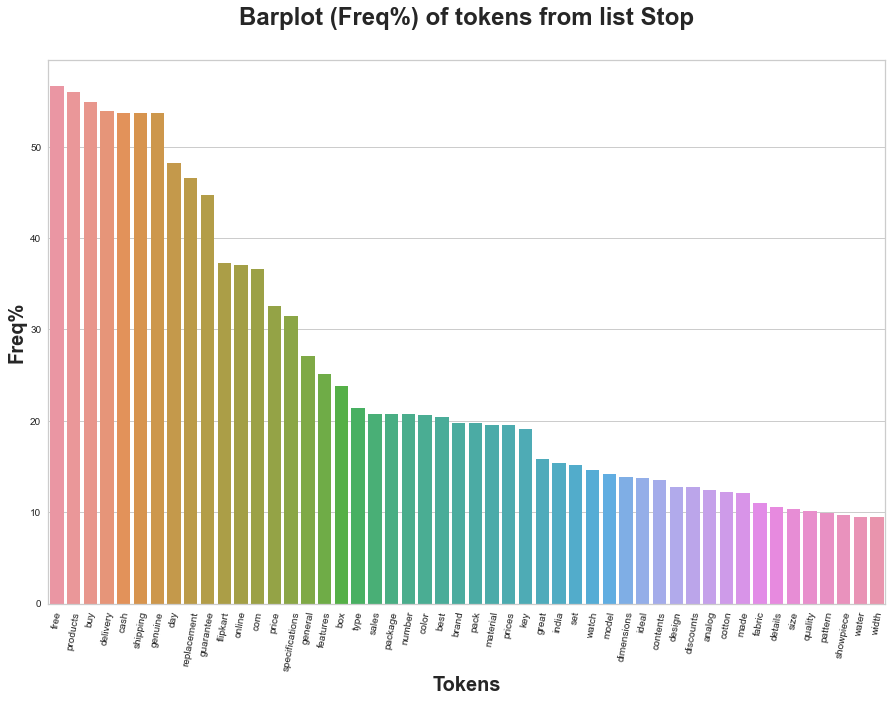

Text(0.5, 1.0, 'Barplot (Freq%) of tokens from list Stop')

In [ ]:
most_freq_tokens()

Lematization

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(Stop):
    return [lemmatizer.lemmatize(w) for w in Stop]

In [ ]:
df4 = df3.copy()

In [ ]:
df4['Lem'] = df4.Stop.apply(lambda x : lemmatize_text(x))

Verification

In [ ]:
diff = set(df4.at[2, 'Stop']) - set(df4.at[2, 'Lem'])
diff

{'boys',
 'brands',
 'cms',
 'contents',
 'dimensions',
 'features',
 'girls',
 'gives',
 'prints',
 'products',
 'sales',
 'specifications',
 'takes',
 'towels',
 'women',
 'years'}

In [ ]:
len(set(df4.at[2, 'Token'])), len(set(df4.at[2, 'Lem']))

(124, 84)

In [ ]:
df4.Lem[0]

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'loving',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'special',
 'moment',
 'joyous',
 'beauty',
 'gi

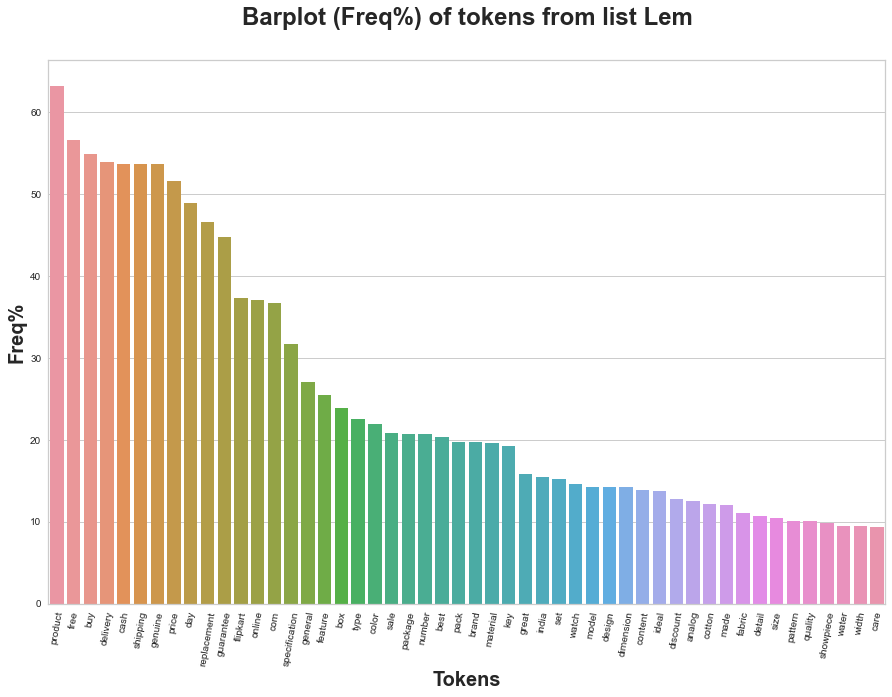

Text(0.5, 1.0, 'Barplot (Freq%) of tokens from list Lem')

In [ ]:
most_freq_tokens(feature='Lem', table=df4)

# II.C Prepare table for bags-of-words, tfidf & DL

In [ ]:
df5 = df4.copy()

In [ ]:
df5['Stop_bow'] = df5.Stop.apply(lambda x : ' '.join(x))

In [ ]:
df5['Lem_bow'] = df5.Lem.apply(lambda x : ' '.join(x))

In [ ]:
df5['Token_dl'] = df5.Token.apply(lambda x : ' '.join(x))

In [ ]:
df5.head(3)

Category                                        description  \
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...   
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...   
2        Baby Care  Key Features of Eurospa Cotton Terry Face Towe...   

                                               Token  \
0  [key, features, of, elegance, polyester, multi...   
1  [specifications, of, sathiyas, cotton, bath, t...   
2  [key, features, of, eurospa, cotton, terry, fa...   

                                                Stop  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, eurospa, cotton, terry, face, ...   

                                                 Lem  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   
2  [key, feature, eurospa, cotton, terry, face, t...   

                                            Stop_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   

                                             Lem_bow  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   

                                            Token_dl  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel 3...  
2  key features of eurospa cotton terry face towe...

# II.D Bag-of-words & TFIDF

In [ ]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'Lem_bow'
cv_fit = cvect.fit(df5[feat])
ctf_fit = ctf.fit(df5[feat])

cv_transform = cvect.transform(df5[feat])  
ctf_transform = ctf.transform(df5[feat])  

### /!\ Essai de Bigram

In [ ]:
df5b = df5.copy()

In [ ]:
df5b['Bigram'] = df5b.Token.apply(lambda x : list(nltk.bigrams(x)))

In [ ]:
df5b.head(3)

Category                                        description  \
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...   
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...   
2        Baby Care  Key Features of Eurospa Cotton Terry Face Towe...   

                                               Token  \
0  [key, features, of, elegance, polyester, multi...   
1  [specifications, of, sathiyas, cotton, bath, t...   
2  [key, features, of, eurospa, cotton, terry, fa...   

                                                Stop  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, eurospa, cotton, terry, face, ...   

                                                 Lem  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   
2  [key, feature, eurospa, cotton, terry, face, t...   

                                            Stop_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   

                                             Lem_bow  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   

                                            Token_dl  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel 3...   
2  key features of eurospa cotton terry face towe...   

                                              Bigram  
0  [(key, features), (features, of), (of, eleganc...  
1  [(specifications, of), (of, sathiyas), (sathiy...  
2  [(key, features), (features, of), (of, eurospa...

In [ ]:
df5b['Bigram_bow'] = df5b.Bigram.apply(lambda x : ' '.join(str(x)))

In [ ]:
# création du bag of bigrams (CountVectorizer et Tf-idf)

cvect2 = CountVectorizer(analyzer='char_wb', max_df=0.95, min_df=1)
ctf2 = TfidfVectorizer(analyzer='char_wb', max_df=0.95, min_df=1)

feat2 = 'Bigram_bow'
cv_fit2 = cvect2.fit(df5b[feat])
ctf_fit2 = ctf2.fit(df5b[feat])

cv_transform2 = cvect2.transform(df5b[feat])  
ctf_transform2 = ctf2.transform(df5b[feat])

# /!\ INtermediate functions

In [ ]:
import time

In [ ]:
type(ctf_transform2)

scipy.sparse.csr.csr_matrix

In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features = cv_transform, table = df5):
    time1 = time.time()
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters = table["Category"].nunique(), init = "k-means++", random_state = 42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(table.Category, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [ ]:
ARI, X_tsne, labels = ARI_fct()

ARI :  0.4431 time :  10.0


In [ ]:
def most_freq_tokens2(table = df5, feature = 'Stop', number=50, y='Freq%', ax=None, fontsize = 16): #y=Presence or Frequence
    #if ax is None:
     #   ax = plt.gca()
    dico = {}
    for elt in table[feature]:
        for elt2 in elt:
            if elt2 not in dico:
                dico[elt2] = 1
            else:
                dico[elt2] += 1
    dico2 = dico.copy()
    for elt in dico2:
        dico2[elt] = 0
    for elt in dico2:
        for elt2 in table[feature]:
            if elt in elt2:
                dico2[elt] += 1
            else:
                None
    df = pd.DataFrame(dico.keys())
    df.columns = [feature]
    df.insert(1, 'Presence', dico.values())
    df.insert(2, 'Frequence', dico2.values())
    df.insert(3, 'Freq%', round(df.Frequence/len(table)*100, 2))
    df2 = df.sort_values(y, ascending=False)
    #plt.figure(figsize=(15,10))
    fig = sns.barplot(data=df2.iloc[:number,:], x=feature, 
                y=y, ax=ax).set_title(f'Barplot ({y}) of tokens from column {feature}', 
                                      fontsize = fontsize, pad = 35, fontweight = 'bold', y=0.9)
    plt.xlabel('Tokens', fontsize = fontsize, fontweight = 'bold')
    plt.ylabel(f'{y}', fontsize = fontsize, fontweight = 'bold')
    plt.xticks(rotation=80)
    plt.show()
    return

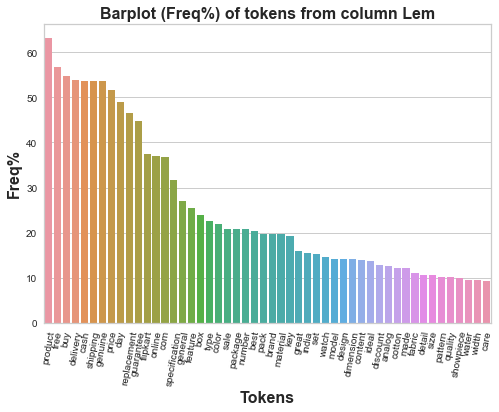

In [ ]:
most_freq_tokens2(feature='Lem')

In [ ]:
# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne=X_tsne, table=df5, labels=labels, ARI=ARI, mode='Word2Vec', feature='Lem') :   
    df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
    df_tsne["Category"] = table["Category"]
    df_tsne["KMeans"] = labels
    ## Draw figures in subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(f'Comparaison des 2 t-SNE (ARI = {round(ARI, 3)}) avec méthode : {mode}', fontsize = 24, fontweight = 'bold')
    #1,0 => crosstab with colors
    sns.heatmap(pd.crosstab(index=df_tsne['Category'], columns=df_tsne['KMeans'], normalize='index'), 
                ax=axes[1,0], cmap="YlGnBu", annot=True)
    axes[1,0].set_title('Crosstab Categories vs Clusters', fontsize = 20, fontweight = 'bold') # title with fontsize 20

    hue_order = ['Beauty and Personal Care', 'Kitchen & Dining', 'Baby Care', 
                 'Computers', 'Home Furnishing', 'Watches', 'Home Decor & Festive Needs']
    colors = {'Beauty and Personal Care':vert, 'Kitchen & Dining':pink, 'Baby Care':choco,
              'Computers':bleu, 'Home Furnishing':rouge, 'Watches':jaune, 'Home Decor & Festive Needs':cyan}
    sns.scatterplot(x="tsne1", y="tsne2", ax=axes[0,0],
        hue="Category", hue_order=hue_order, data=df_tsne, legend="brief", palette=colors)
    axes[0,0].set_xlabel('tsne1', fontsize = 22, fontweight = 'bold')
    axes[0,0].set_ylabel('tsne2', fontsize = 22, fontweight = 'bold')
    axes[0,0].legend(prop={'size': 9})
    axes[0,0].set_title('TSNE selon les catégories', fontsize = 20, pad = 35, fontweight = 'bold')
    
    sns.scatterplot(x="tsne1", y="tsne2", ax=axes[0,1],
        hue="KMeans", data=df_tsne, legend="brief", palette=pastel2[:table['Category'].nunique()])
    axes[0,1].set_title('TSNE selon les clusters', fontsize = 20, pad = 35, fontweight = 'bold')

    axes[0,1].set_xlabel('tsne1', fontsize = 22, fontweight = 'bold')
    axes[0,1].set_ylabel('tsne2', fontsize = 22, fontweight = 'bold')
    axes[0,1].legend(prop={'size': 9})

    most_freq_tokens2(table=table, ax=axes[1,1], number=20, y='Freq%', feature=feature)

    #axes.flat[-1].set_visible(False) # to remove last plot
    return

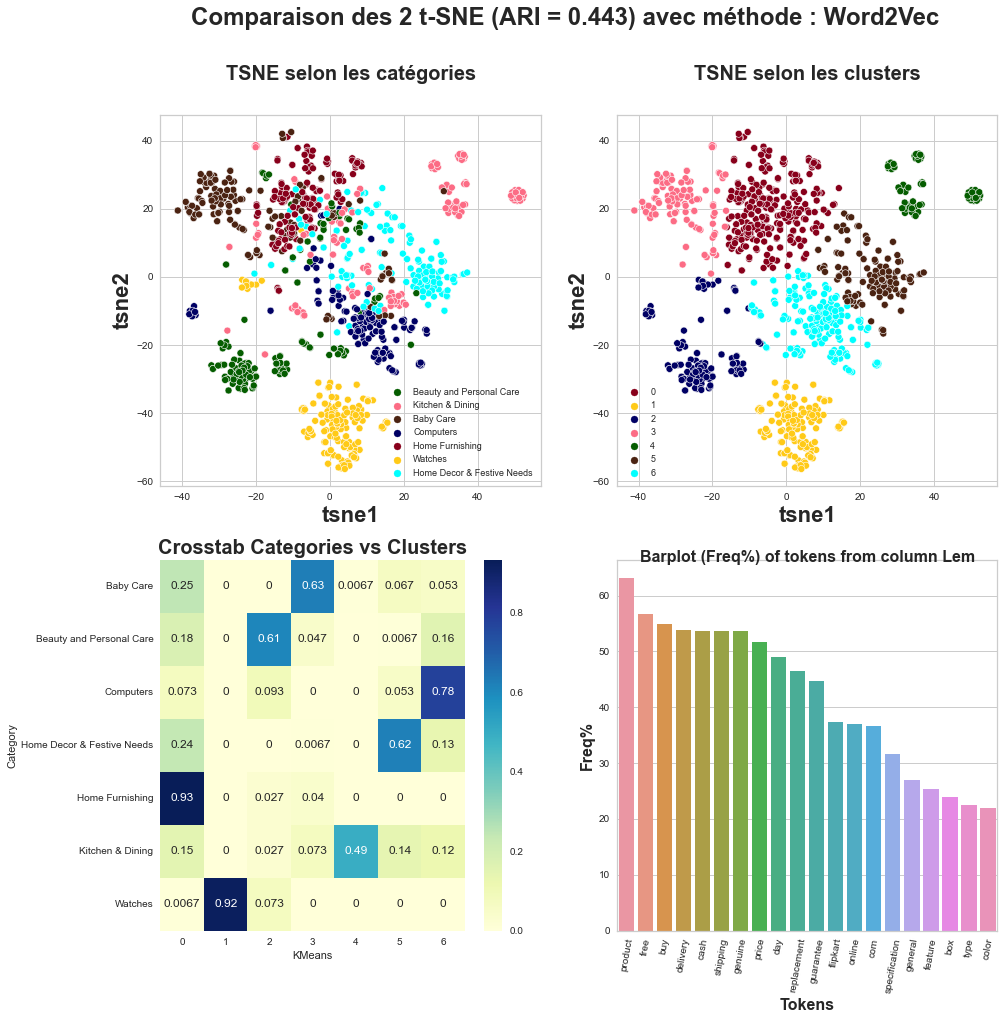

In [ ]:
TSNE_visu_fct()

# II.D Word2Vec

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [ ]:
df5['Len_Lem'] = df5.Lem.apply(lambda x : len(x))

In [ ]:
df5.Len_Lem.max()

358

In [ ]:
df5.head(3)

Category                                        description  \
0  Home Furnishing  Key Features of Elegance Polyester Multicolor ...   
1        Baby Care  Specifications of Sathiyas Cotton Bath Towel (...   
2        Baby Care  Key Features of Eurospa Cotton Terry Face Towe...   

                                               Token  \
0  [key, features, of, elegance, polyester, multi...   
1  [specifications, of, sathiyas, cotton, bath, t...   
2  [key, features, of, eurospa, cotton, terry, fa...   

                                                Stop  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, eurospa, cotton, terry, face, ...   

                                                 Lem  \
0  [key, feature, elegance, polyester, multicolor...   
1  [specification, sathiyas, cotton, bath, towel,...   
2  [key, feature, eurospa, cotton, terry, face, t...   

                                            Stop_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   

                                             Lem_bow  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   

                                            Token_dl  Len_Lem  
0  key features of elegance polyester multicolor ...      147  
1  specifications of sathiyas cotton bath towel 3...       61  
2  key features of eurospa cotton terry face towe...      148

In [ ]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 358 # adapt to length of sentences
sentences = [gensim.utils.simple_preprocess(text) for text in df5.Lem_bow.to_list()]

In [ ]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4605
Word2Vec trained


In [ ]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4606


## Création de la matrice d'embedding

In [ ]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4606, 300)


## Création du modèle d'embedding

In [ ]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 358)]             0         
                                                                 
 embedding (Embedding)       (None, 358, 300)          1381800   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,381,800
Trainable params: 1,381,800
Non-trainable params: 0
_________________________________________________________________


## Exécution du modèle

In [ ]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 6ms/step


(1050, 300)

# II.E Doc2Vec

In [ ]:
docs2 = []
l = [i for i in range(0, len(df5))]
for elt, j in zip(df5['Lem'], l):
    docs2.append(TaggedDocument(words=elt, tags=[j]))

In [ ]:
#docs2

In [ ]:
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=358, min_count=2, epochs=40)

In [ ]:
model2.build_vocab(docs2)

In [ ]:
model2.wv

In [ ]:
print(f"Word 'product' appeared {model2.wv.get_vecattr('product', 'count')} times in the docs2 corpus.")

Word 'product' appeared 864 times in the docs2 corpus.


In [ ]:
model2.train(docs2, total_examples=model2.corpus_count, epochs=model2.epochs)

In [ ]:
vector = model2.infer_vector(['key', 'features', 'of', 'elegance', 'polyester'])
print(vector)

[ 1.89068858e-02  5.74901663e-02 -1.28895387e-01  2.28381064e-02
 -1.58329494e-02  9.35045350e-03 -6.54470697e-02  1.15627004e-02
 -5.28412759e-02 -3.03220525e-02 -4.07046415e-02  1.42414728e-02
 -4.31628302e-02 -3.41490582e-02  2.74009556e-02 -1.42672863e-02
 -5.46146603e-03  6.53102323e-02  4.07389142e-02  5.03708124e-02
  3.16149034e-02 -3.64029519e-02 -4.79057916e-02 -7.70096704e-02
 -6.76981499e-03  4.54849377e-02 -1.61623699e-03 -4.03525978e-02
  1.08354762e-01 -2.23418530e-02 -1.54609401e-02  2.23861430e-02
 -5.45720197e-02  1.02042623e-01 -2.79151462e-02  3.35799754e-02
  2.64433697e-02 -4.64583635e-02  4.86075319e-03  8.81773978e-02
 -1.44254696e-02 -1.70582999e-02  3.56243737e-02 -3.12577151e-02
  5.28556779e-02  8.34439397e-02  1.59098636e-02  6.39560968e-02
  8.89176056e-02 -1.15672328e-01  6.90294579e-02  1.39548378e-02
 -1.23143129e-01 -8.92507806e-02 -2.21159924e-02  1.05202443e-03
 -1.47104234e-01  1.50929010e-02  1.33430921e-02 -5.21071069e-02
  3.44047286e-02 -1.46762

In [ ]:
l = []
for k in df5['Lem']:
    l.append(model2.infer_vector(k))

In [ ]:
df_ = np.row_stack(l)

In [ ]:
df_.shape

(1050, 358)

# II.F BERT

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


## Fonctions communes

In [ ]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

In [ ]:
df5['Len_Bert'] = df5.Token.apply(lambda x : len(x))

In [ ]:
df5.Len_Bert.max()

584

<AxesSubplot:xlabel='Len_Bert', ylabel='Count'>

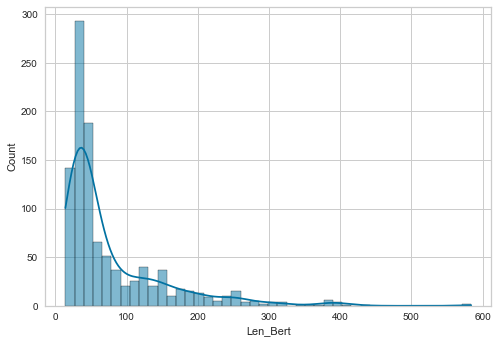

In [ ]:
sns.histplot(df5.Len_Bert, kde=True)

## BERT HuggingFace

### 'bert-base-uncased'

In [ ]:
df5.columns

Index(['Category', 'description', 'Token', 'Stop', 'Lem', 'Stop_bow',
       'Lem_bow', 'Token_dl', 'Len_Lem', 'Len_Bert'],
      dtype='object')

In [ ]:
max_length = 512 #We know that BERT has a max length limit of tokens = 512
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df5.Token_dl.to_list()

Downloading: 100%|██████████| 570/570 [00:00<00:00, 285kB/s]
loading configuration file config.json from cache at C:\Users\denis/.cache\huggingface\hub\models--bert-base-uncased\snapshots\a265f773a47193eed794233aa2a0f0bb6d3eaa63\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

Downloading: 100%|██████████| 536M/536M [00:34<00:00, 15.5MB/s] 
loading weights file tf_model.h5 

## /!\ Beaucoup trop long!! à relancer si besoin <br>
file features_bert saved in csv format

# Création des features = très long!! 17min

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

In [ ]:
#features_bert

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# save to csv file
savetxt('features_bert.csv', features_bert, delimiter=',')

## Open features_bert.csv file

In [ ]:
from numpy import loadtxt
# load array
features_bert = loadtxt('features_bert.csv', delimiter=',')

In [ ]:
#type(last_hidden_states_tot)
##pas utile

# II.F USE - Universal Sentence Encoder

In [ ]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [ ]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.12.0
2.12.0
Num GPUs Available:  0
False


trouble to execute

import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

batch_size = 10
sentences = df5['Token_dl'].to_list()

features_USE = feature_USE_fct(sentences, batch_size)

# II.G BIG FINAL FUNCTION

In [ ]:
def big_fct(table=df5, mode = 'Count2Vec', feature = 'Lem'):
    dico = {'Count2Vec':cv_transform, 'Tf-idf' : ctf_transform, 
            'Word2Vec' : embeddings, 'Doc2Vec' : df_, 'BERT' : features_bert} #, 'USE': features_USE}
    ARI, X_tsne, labels = ARI_fct(features = dico[mode], table = table)

    TSNE_visu_fct(X_tsne=X_tsne, table=table, labels=labels, ARI=ARI, mode=mode, feature=feature)
    return

In [ ]:
type(embeddings)

numpy.ndarray

ARI :  0.31 time :  8.0


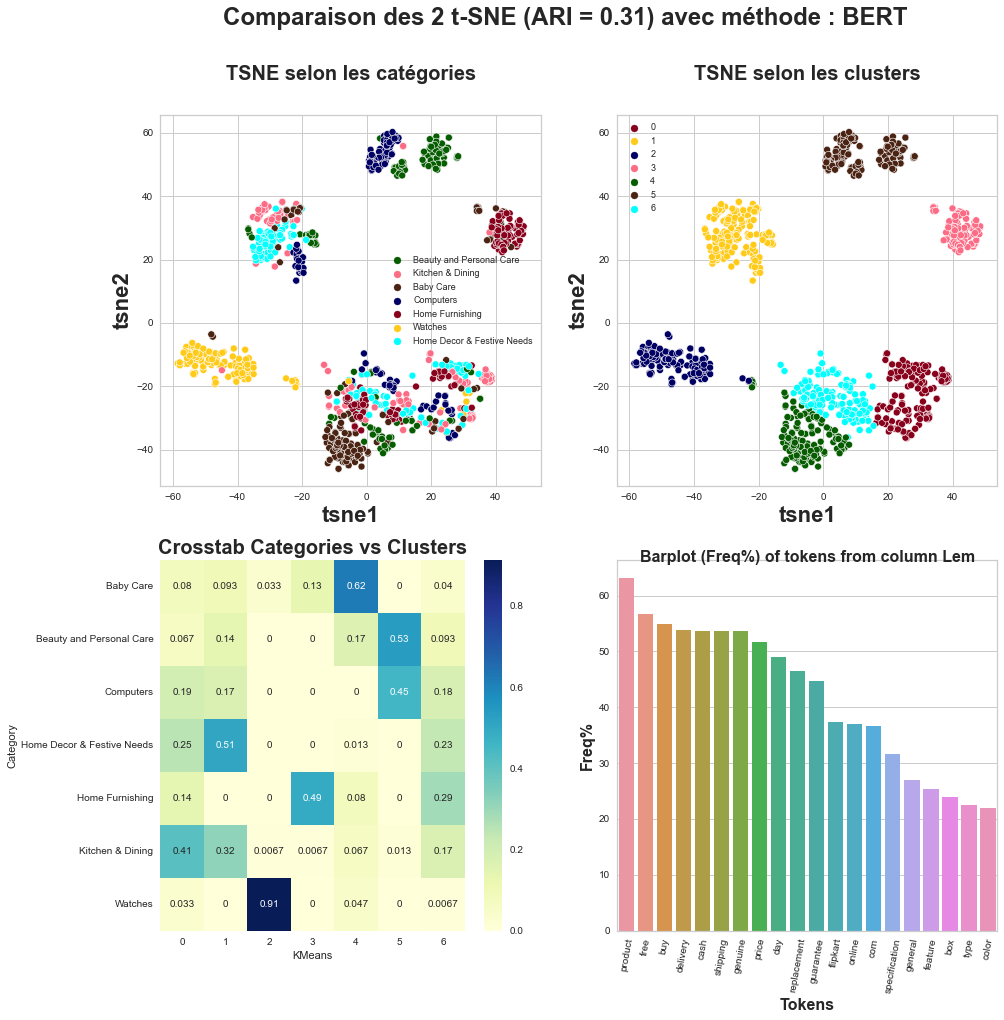

In [ ]:
big_fct(mode='BERT')

In [ ]:
def big_fct2(table=df5b, mode = 'Count2Vec_Bigram', feature = 'Lem'):
    dico = {'Count2Vec':cv_transform, 'Tf-idf' : ctf_transform,
            'Count2Vec_Bigram':cv_transform2, 'Tf-idf_Bigram' : ctf_transform2, 
            'Word2Vec' : embeddings, 'Doc2Vec' : df_, 'BERT' : features_bert} #, 'USE': features_USE}
    ARI, X_tsne, labels = ARI_fct(features = dico[mode], table = table)

    TSNE_visu_fct(X_tsne=X_tsne, table=table, labels=labels, ARI=ARI, mode=mode, feature=feature)
    return

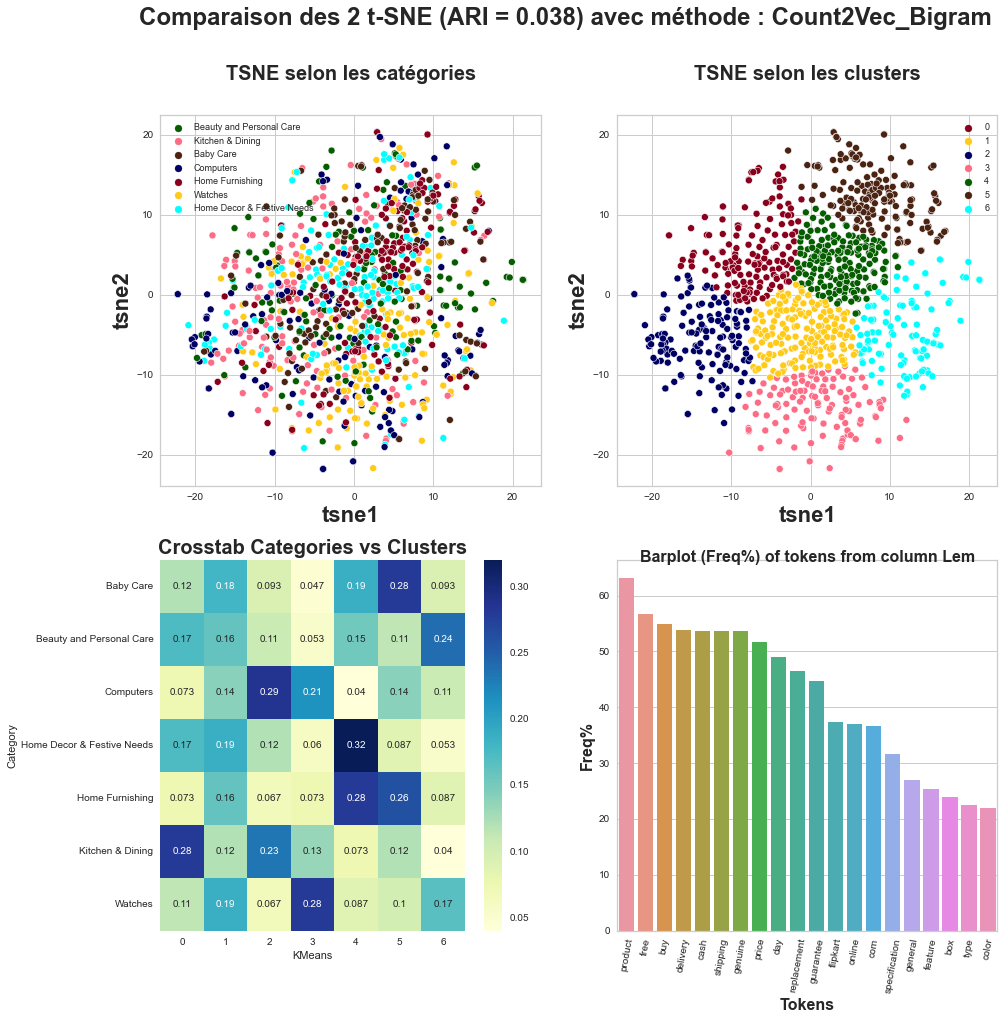

In [ ]:
big_fct2(mode='Count2Vec_Bigram')

############################

# III. IMAGE TREATMENTS

In [ ]:
df2.head(3)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   

                               product_category_tree         Category  \
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   

                                         description       product_rating  \
0  Key Features of Elegance Polyester Multicolor ...  No rating available   
1  Specifications of Sathiyas Cotton Bath Towel (...  No rating available   
2  Key Features of Eurospa Cotton Terry Face Towe...  No rating available   

        overall_rating     brand  \
0  No rating available  Elegance   
1  No rating available  Sathiyas   
2  No rating available   Eurospa   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...

In [ ]:
df10 = df2.copy()

In [ ]:
df10.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'Category', 'pid', 'retail_price',
       'discounted_price', 'image', 'is_FK_Advantage_product', 'description',
       'product_rating', 'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
df10.uniq_id.nunique(), df10.image.nunique(), df10.shape

(1050, 1050, (1050, 16))

In [ ]:
df10.head(3)

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   

                               product_category_tree         Category  \
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   

                                         description       product_rating  \
0  Key Features of Elegance Polyester Multicolor ...  No rating available   
1  Specifications of Sathiyas Cotton Bath Towel (...  No rating available   
2  Key Features of Eurospa Cotton Terry Face Towe...  No rating available   

        overall_rating     brand  \
0  No rating available  Elegance   
1  No rating available  Sathiyas   
2  No rating available   Eurospa   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...

In [ ]:
to_keep2 = ['product_name', 'Category', 'image']

In [ ]:
df10 = df10.drop(columns=[ele for ele in df10.columns if ele not in to_keep2])

In [ ]:
df10.head(3)

product_name         Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg

In [ ]:
list_images = os.listdir(os.getcwd()+'\\Flipkart\\Images')

In [ ]:
path_to_dir=os.path.abspath(os.getcwd())

In [ ]:
ele = list_images[0]
type(df10[df10['image']==ele]['product_name'])

pandas.core.series.Series

Create a fct to open jpg files

In [ ]:
df10.head(5)

product_name         Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing   
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [ ]:
len(list_images), df10.shape

(1050, (1050, 3))

In [ ]:
def open_image(image=0):
    img = Image.open(os.getcwd()+f'\\Flipkart\\Images\\{list_images[image]}')
    product_name = df10[df10['image']==list_images[image]]['product_name']
    print(f'product_name = {product_name}')
    return img

product_name = 423    YGS Keyboard Case for Asus Memo Pad 7in Tab
Name: product_name, dtype: object


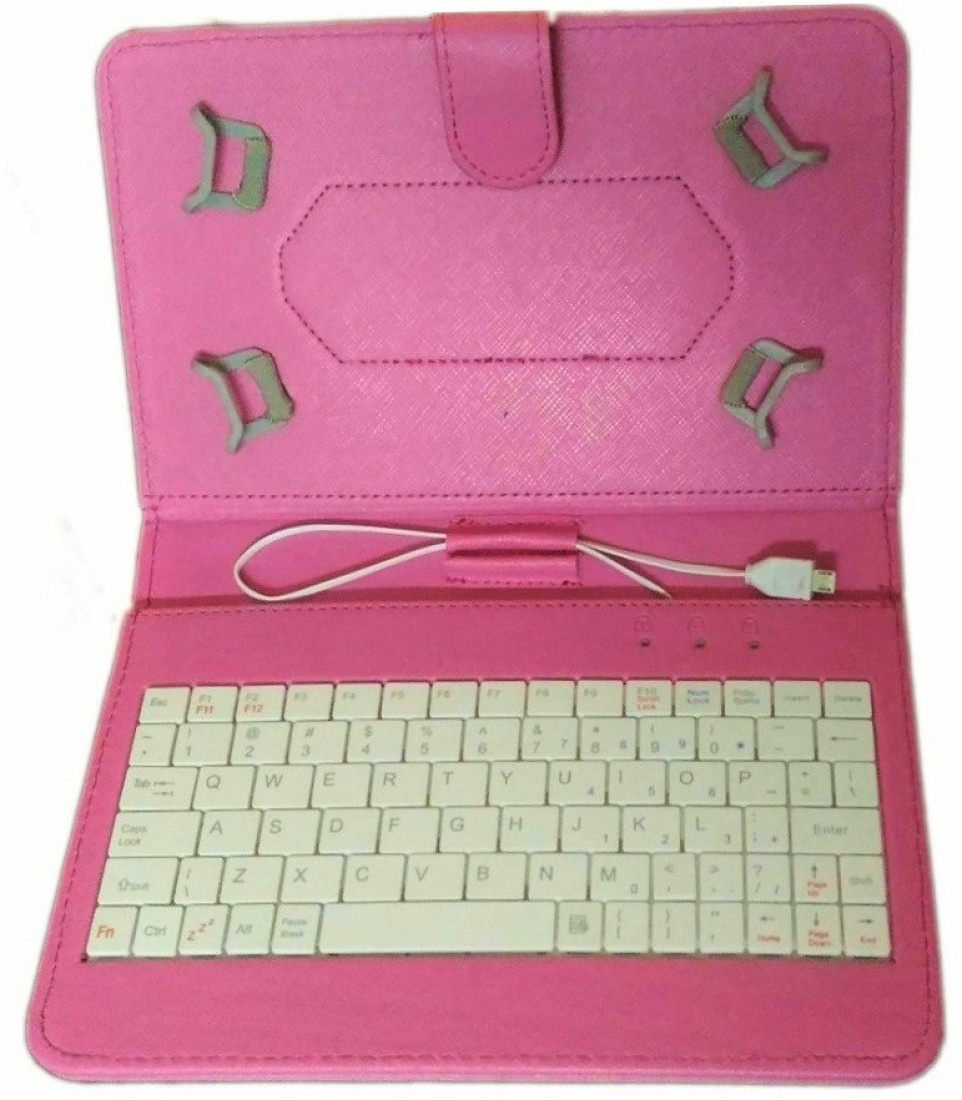

In [ ]:
open_image(image=4)

In [ ]:
import cv2

In [ ]:
img = open_image()

product_name = 280    palito PLO 166 Analog Watch  - For Girls, Women
Name: product_name, dtype: object


In [ ]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 687 px, hauteur : 1162 px


In [ ]:
cv2.imread(os.getcwd()+f'\\Flipkart\\Images\\{list_images[0]}').shape

(1162, 687, 3)

In [ ]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (255, 255, 255)


In [ ]:
# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (1162, 687, 3)


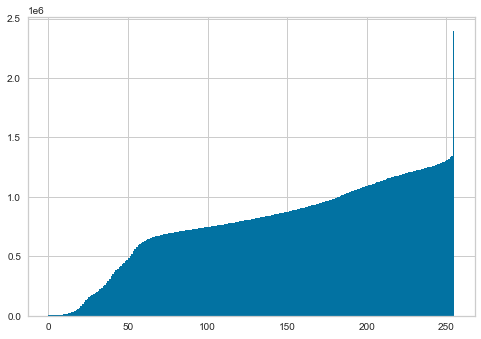

In [ ]:
# Charger l'image comme matrice de pixels
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True


n, bins, patches = plt.hist(mat.flatten(), bins=range(256), cumulative=True) #fletten = 1 vector
plt.show()

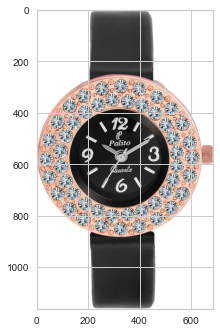

In [ ]:
plt.imshow(mat)

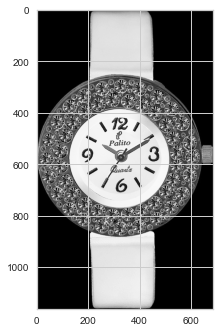

In [ ]:
img_grey = cv2.cvtColor(mat, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey)

In [ ]:
from PIL.ImageOps import autocontrast


In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
toto = autocontrast(img, cutoff=2)

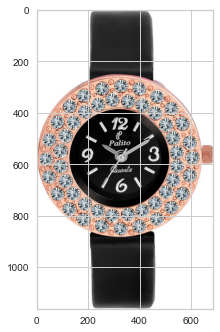

In [ ]:
plt.imshow(np.array(toto))

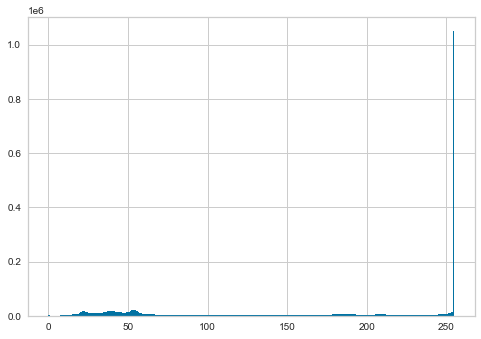

In [ ]:
plt.hist(np.array(img).flatten(), bins=range(256))
plt.show()

In [ ]:
img_grey2 = img.convert('L')

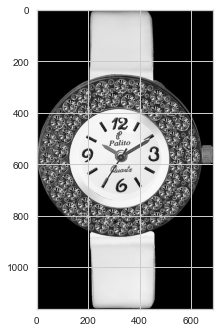

In [ ]:
plt.imshow(np.array(img_grey2))

In [ ]:
type(img_grey), type(img_grey2)

(numpy.ndarray, PIL.Image.Image)

## FCTION

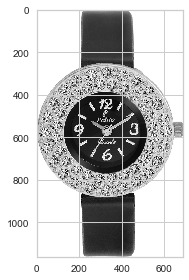

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread(os.getcwd()+f'\\Flipkart\\Images\\{list_images[0]}', as_gray=True)
imshow(image)

In [ ]:
from PIL import ImageFilter
from PIL import Image, ImageOps

In [ ]:
df10.head(5)

product_name         Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  Home Furnishing   
4  Jaipur Print Cotton Floral King sized Double B...  Home Furnishing   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  d4684dcdc759dd9cdf41504698d737d8.jpg  
4  6325b6870c54cd47be6ebfbffa620ec7.jpg

In [ ]:
import numpy as np
import cv2 as cv

In [ ]:
def image_treatment(elt=0, cutoff=10, filtration='boxblur', n_features=len(df10)):
    n_images = len(df10)
    #step 1 : open image
    product=df10.image[elt]
    img = Image.open(os.getcwd()+f'\\Flipkart\\Images\\{product}')
    #step 2 : convert to grey
    img2 = img.convert('L')
    #step 3 : autocontrast
    img3 = autocontrast(image=img2, cutoff=cutoff)
    #step 4 : noise filtration
    dico = {'median':ImageFilter.MedianFilter, 'min':ImageFilter.MedianFilter, 
            'blur':ImageFilter.BLUR, 'gaussian':ImageFilter.GaussianBlur(radius=2), 
            'boxblur':ImageFilter.BoxBlur(1)}
    if filtration==None:
        img4 = img3.copy()
    else:
        img4 = img3.filter(dico[filtration])
    #step 5 : equalization
    img5 = ImageOps.equalize(img4)

    #step 6 : SIFT detection
    sift = cv.SIFT_create()
    kp, des = sift.detectAndCompute(np.array(img5),None)
    img6 = cv.drawKeypoints(np.array(img5),kp, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    #step 7 : features extraction
    des_samples = des[np.random.randint(des.shape[0], size=n_features)]

    #step 7 : show images
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"Image n°{elt}", fontsize = 24, fontweight = 'bold')  

    axes[0,0].imshow(np.array(img))
    axes[0,0].set_title('Raw image', fontsize = 16, fontweight = 'bold')

    axes[0,1].imshow(np.array(img2))
    axes[0,1].set_title('B&W image', fontsize = 16, fontweight = 'bold')

    axes[0,2].imshow(np.array(img3))
    axes[0,2].set_title(f'Autocontrast (cut-off : {cutoff}%)', fontsize = 16, fontweight = 'bold')
    
    axes[1,0].imshow(np.array(img4))
    axes[1,0].set_title(f'Filtration : {filtration}', fontsize = 16, fontweight = 'bold')

    axes[1,1].imshow(np.array(img5))
    axes[1,1].set_title(f'Equalization', fontsize = 16, fontweight = 'bold')

    axes[1,2].imshow(img6)
    axes[1,2].set_title(f'Sift detection', fontsize = 16, fontweight = 'bold')

    #axes[1,2].set_axis_off()

    return des_samples

array([[  1.,   0.,   0., ...,   3.,   0.,   0.],
       [ 55.,  13.,   0., ...,  17., 115.,  24.],
       [  6.,  76., 105., ...,   0.,   1.,  64.],
       ...,
       [  0.,   0.,  70., ...,  97., 178.,  51.],
       [ 10.,   0.,   0., ...,   1., 147., 111.],
       [  1.,   0.,   0., ...,   3.,   0.,   0.]], dtype=float32)

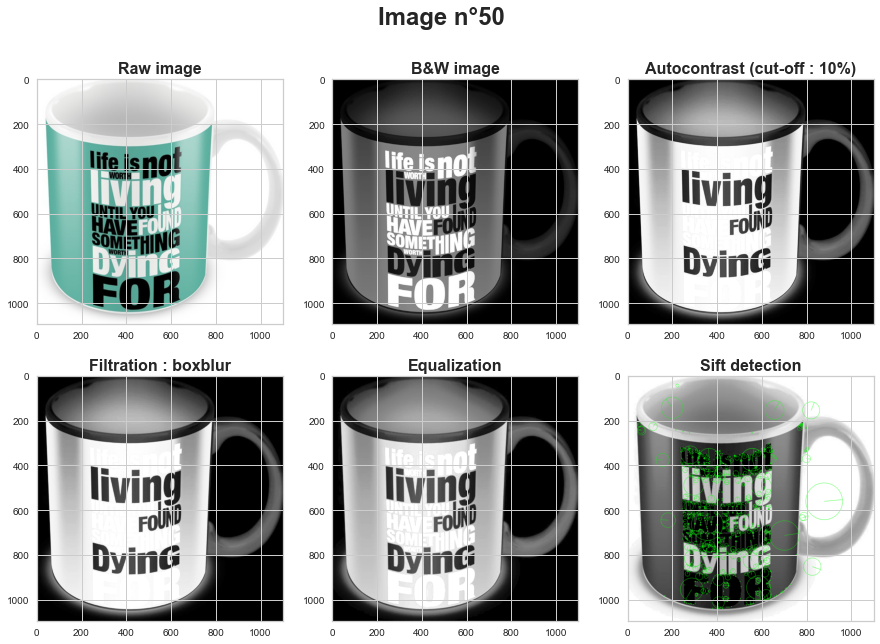

In [ ]:
image_treatment(elt=50, cutoff=10, filtration='boxblur')

def features_extraction(cutoff=10, filtration='boxblur', n_features=len(df10), n_images=len(df10)):
    dico = {'median':ImageFilter.MedianFilter, 'min':ImageFilter.MedianFilter, 
                'blur':ImageFilter.BLUR, 'gaussian':ImageFilter.GaussianBlur(radius=2), 
                'boxblur':ImageFilter.BoxBlur(1)}
    #step 1 : open image
    total_SIFT_features = []
    for i in range(n_images): #n_samples):
        product=df10.image[i]
        img = Image.open(os.getcwd()+f'\\Flipkart\\Images\\{product}')
        #step 2 : convert to grey
        img2 = img.convert('L')
        #step 3 : autocontrast
        img3 = autocontrast(image=img2, cutoff=cutoff)
        #step 4 : noise filtration
        
        if filtration==None:
            img4 = img3.copy()
        else:
            img4 = img3.filter(dico[filtration])
        #step 5 : equalization
        img5 = ImageOps.equalize(img4)

        #step 6 : SIFT detection
        sift = cv.SIFT_create()
        kp, des = sift.detectAndCompute(np.array(img5),None)
        #img6 = cv.drawKeypoints(np.array(img5),kp, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        #step 7 : features extraction
        des_samples = des[np.random.randint(des.shape[0], size=n_features)]
    
        total_SIFT_features.append(des_samples)
        #total_SIFT_features[(i*n_images):(i*n_images)+n_images,] = des_samples[:]
    #df11 = pd.DataFrame(data=total_SIFT_features) #, columns=[f'Feat_{str(ele)}' for ele in range(n_images)])
    #df11.inert(0, 'product_name', df10.product_name[:n_images])
    #df11.insert(1, 'Category', df10.Category[:n_images])
    #df11.insert(2, 'image', df10.image[:n_images])
    return total_SIFT_features

In [ ]:
def features_extraction2(cutoff=10, filtration='boxblur', n_images=len(df10)):
    dico = {'median':ImageFilter.MedianFilter, 'min':ImageFilter.MedianFilter, 
                'blur':ImageFilter.BLUR, 'gaussian':ImageFilter.GaussianBlur(radius=2), 
                'boxblur':ImageFilter.BoxBlur(1)}
    #step 1 : open image
    total_SIFT_features = []
    for i in range(n_images): #n_samples):
        product=df10.image[i]
        img = Image.open(os.getcwd()+f'\\Flipkart\\Images\\{product}')
        #step 2 : convert to grey
        img2 = img.convert('L')
        #step 3 : autocontrast
        img3 = autocontrast(image=img2, cutoff=cutoff)
        #step 4 : noise filtration
        
        if filtration==None:
            img4 = img3.copy()
        else:
            img4 = img3.filter(dico[filtration])
        #step 5 : equalization
        img5 = ImageOps.equalize(img4)

        #step 6 : SIFT detection
        sift = cv.SIFT_create()
        kp, des = sift.detectAndCompute(np.array(img5),None)
        #img6 = cv.drawKeypoints(np.array(img5),kp, 0, (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        #step 7 : features extraction
        ###des_samples = des[np.random.randint(des.shape[0], size=n_features)]
        total_SIFT_features.append(des)
        #for d in des:
            #total_SIFT_features.append(d)

    sift_keypoints_by_img = np.asarray(total_SIFT_features)
    total_SIFT_features = np.concatenate(sift_keypoints_by_img, axis=0) 
    print("Nombre de descripteurs : ", total_SIFT_features.shape) 
        
    #df11 = pd.DataFrame(data=total_SIFT_features) #, columns=[f'Feat_{str(ele)}' for ele in range(n_images)])
    #df11.insert(0, 'product_name', df10.product_name[:n_images])
    #df11.insert(1, 'Category', df10.Category[:n_images])
    #df11.insert(2, 'image', df10.image[:n_images])
    
    return total_SIFT_features, sift_keypoints_by_img

In [ ]:
sift_keypoints_all = features_extraction2()[0] # 9min

Nombre de descripteurs :  (10043814, 128)


In [ ]:
sift_keypoints_by_img = features_extraction2()[1] #15min 25'

Nombre de descripteurs :  (10043814, 128)


In [ ]:
type(sift_keypoints_all)

numpy.ndarray

sift_keypoints_all

In [ ]:
#sift_keypoints_all.tofile('sift_keypoints_all.csv',sep=',',format='%10.5f')

In [ ]:
#sift_keypoints_all2 = np.loadtxt('sift_keypoints_all.csv', delimiter=',')

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans3 = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans3.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes") # 8min

Nombre de clusters estimés :  3169
Création de 3169 clusters de descripteurs ...
temps de traitement kmeans :           520.58 secondes


type(kmeans3)

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans3, des, image_num):
    res = kmeans3.predict(des)
    hist = np.zeros(len(kmeans3.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans3, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            94.55 secondes


im_features

im_features.tofile('im_features2.csv',sep=',',format='%10.5f')

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3169)
Dimensions dataset après réduction PCA :  (1050, 743)


In [ ]:
type(feat_pca)

numpy.ndarray

In [ ]:
feat_pca

array([[-9.50420987e-03, -2.72111823e-03,  5.67539301e-03, ...,
         1.09508407e-04, -1.57073981e-04,  6.98344316e-06],
       [-1.31310760e-02,  1.23041131e-03, -2.13220671e-03, ...,
         2.57243380e-04,  3.33007459e-04,  3.83003031e-05],
       [-5.83765341e-03, -1.33072209e-03, -8.82845458e-05, ...,
        -4.49266160e-04,  1.26523062e-03,  6.37348275e-04],
       ...,
       [-3.62824163e-03, -1.00630273e-03, -5.09155567e-03, ...,
        -1.64030775e-05,  1.05684832e-04, -1.02017441e-05],
       [-9.51057148e-03,  5.60659580e-03, -2.00758605e-03, ...,
        -8.93964879e-04, -5.04999658e-04, -5.78520623e-04],
       [-1.52739156e-03,  2.08182750e-03, -4.41260475e-03, ...,
        -3.35640141e-05,  1.60551540e-05,  1.94245738e-04]])

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
df10.head(3)

product_name         Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg

In [ ]:
df10.shape

(1050, 3)

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_SIFT = tsne.fit_transform(feat_pca)

df_tsne_SIFT = pd.DataFrame(X_tsne_SIFT[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_SIFT["Category"] = df10["Category"]
print(df_tsne_SIFT.shape)

(1050, 3)


In [ ]:
df10.Category.nunique()

7

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne_SIFT)

df_tsne_SIFT["SIFT"] = cls.labels_
print(df_tsne_SIFT.shape)

(1050, 4)


In [ ]:
df_tsne_SIFT

tsne1      tsne2         Category  SIFT
0     15.111763   7.754082  Home Furnishing     5
1      7.347741   5.183775        Baby Care     4
2     11.995005   6.514758        Baby Care     5
3      6.129629   7.095769  Home Furnishing     4
4      6.624669   4.388873  Home Furnishing     4
...         ...        ...              ...   ...
1045  -5.430523  -5.160348        Baby Care     1
1046   5.683795 -18.071529        Baby Care     3
1047  -0.471563   8.723313        Baby Care     4
1048   8.897673  15.475444        Baby Care     5
1049  -9.355364   7.375138        Baby Care     0

[1050 rows x 4 columns]

In [ ]:
df_tsne_SIFT.to_csv('df_tsne_SIFT.csv', index=False)

In [ ]:
df_tsne_SIFT2 = pd.read_csv('df_tsne_SIFT.csv')

In [ ]:
df_tsne_SIFT2['SIFT'].value_counts()

4    171
1    170
5    165
0    151
2    146
3    129
6    118
Name: SIFT, dtype: int64

In [ ]:
def big_fct2(table=df5, mode = 'SIFT', feature = 'Lem'):
    dico = {'Count2Vec':cv_transform, 'Tf-idf' : ctf_transform, 
            'Word2Vec' : embeddings, 'Doc2Vec' : df_, 'BERT' : features_bert,
            'SIFT' : np.array(df_tsne_SIFT2['SIFT'])} #, 'USE': features_USE}
    #ARI, X_tsne, labels = ARI_fct(features = dico[mode], table = table)

    ARI = np.round(adjusted_rand_score(table.Category, df_tsne_SIFT2['SIFT']),4)
    TSNE_visu_fct(X_tsne=X_tsne_SIFT, table=table, labels=np.array(df_tsne_SIFT2['SIFT']), ARI=ARI, mode=mode, feature=feature)
    return

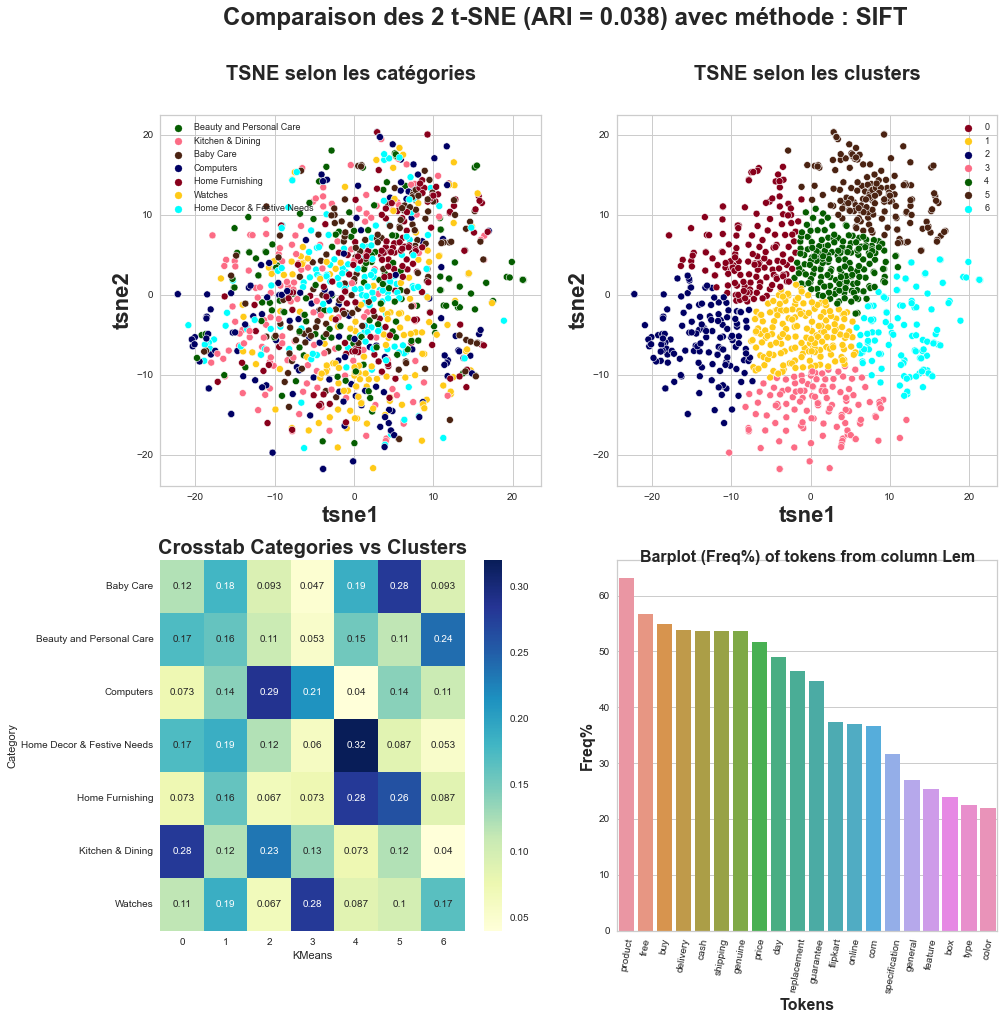

In [ ]:
big_fct2(mode = 'SIFT')

#######################

dico = {}
for elt in df11.columns[3:]:
    dico[elt] = f'Feat_{str(elt)}'

df11.rename(columns=dico, inplace=True)

######################

# B. III. CNN

In [ ]:
import tensorflow as tf

In [ ]:
model_CNN = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape= (512,512,3),
    pooling=None
)

In [ ]:
model_CNN2 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None)
    #classes=1000)


In [ ]:
model_CNN.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 512, 512, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 512, 512, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 512, 512, 3)  0           ['normalization[0][0

In [ ]:
list_images[0]

'009099b1f6e1e8f893ec29a7023153c4.jpg'

In [ ]:
directory = 'Flipkart\\Images_resized2'
images = os.path.join(path_to_dir, directory)

try: 
    os.mkdir(images) 
except OSError as error: 
    print(error)

[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet6\\Flipkart\\Images_resized2'


## Resize figures

In [ ]:
def resize():
    dim = (512, 512)
    #directory = os.getcwd()+f'\\Flipkart\\Images_resized\\'
    for elt in list_images:
        img = cv2.imread(os.getcwd()+f'\\Flipkart\\Images\\{elt}')
        img_resized = cv2.resize(img, dim)
        img_saved = cv2.imwrite(os.getcwd()+f'\\Flipkart\\Images_resized\\{elt}', img_resized)
    return 


In [ ]:
resize()

In [ ]:
df10.head(3)

product_name         Category  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  Home Furnishing   
1                         Sathiyas Cotton Bath Towel        Baby Care   
2                Eurospa Cotton Terry Face Towel Set        Baby Care   

                                  image  
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  64d5d4a258243731dc7bbb1eef49ad74.jpg

In [ ]:
image = cv2.imread(os.getcwd()+f'\\Flipkart\\Images_resized\\{df10.image[0]}')

In [ ]:
image.shape = (1,) + image.shape

In [ ]:
image.shape

(1, 512, 512, 3)

In [ ]:
pred = model_CNN.predict(image)

1/1 [==============================] - 2s 2s/step


In [ ]:
def cnn_model():
    l = []
    model = model_CNN
    for elt in df10.image:
        img = cv2.imread(os.getcwd()+f'\\Flipkart\\Images_resized\\{elt}')
        img.shape = (1,) + img.shape
        pred = model.predict(img)
        l.append(pred.flatten())
    return l

In [ ]:
cnn_model()

1/1 [==============================] - 0s 267ms/step


[array([-0.06176726, -0.2184751 ,  1.130018  , ..., -0.27182648,
         0.01745228, -0.15401931], dtype=float32),
 array([-0.2695844 , -0.24137217, -0.22669554, ..., -0.16555746,
        -0.01771936, -0.24460906], dtype=float32),
 array([-0.25401866, -0.27790517, -0.27791715, ..., -0.07929106,
         1.4563298 , -0.2755827 ], dtype=float32),
 array([-0.25877443, -0.23427518, -0.27768493, ..., -0.15210325,
         0.14583898, -0.27725494], dtype=float32),
 array([-0.20531404,  1.0926048 , -0.00552742, ..., -0.20412384,
         0.1928826 , -0.23875526], dtype=float32),
 array([-0.25923   , -0.2758085 , -0.27770805, ..., -0.1475756 ,
        -0.2694451 , -0.27809724], dtype=float32),
 array([-0.27320567, -0.27846092, -0.27515218, ..., -0.23502032,
        -0.24499354, -0.2767551 ], dtype=float32),
 array([-0.26605237, -0.2752061 , -0.25742552, ..., -0.15199302,
        -0.18909131, -0.25329226], dtype=float32),
 array([-0.26963654, -0.25348938, -0.22004335, ..., -0.25433826,
       

In [ ]:
len(l[0])

358

In [ ]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct2(features = np.array(l), table = df5):
    time1 = time.time()
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = KMeans(n_clusters = table["Category"].nunique(), init = "k-means++", random_state = 42)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(table.Category, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_

In [ ]:
ARI_fct2()

ARI :  0.1936 time :  9.0


(0.1936,
 array([[ 32.63307  ,  10.436352 ],
        [ -7.7751436,  26.010296 ],
        [ -6.644223 ,  27.365465 ],
        ...,
        [-28.56888  , -21.397532 ],
        [-15.9375105,   4.7584815],
        [-16.571053 ,   3.7454414]], dtype=float32),
 array([6, 2, 2, ..., 1, 1, 1]))

In [ ]:
def big_fct3(table=df5, mode = 'CNN', feature = 'Lem'):
    ARI, X_tsne, labels = ARI_fct2(features = np.array(l), table = table)

    #ARI = np.round(adjusted_rand_score(table.Category, df_tsne_SIFT2['SIFT']),4)
    TSNE_visu_fct(X_tsne=X_tsne, table=table, labels=labels, ARI=ARI, mode=mode, feature=feature)
    return

ARI :  0.1936 time :  10.0


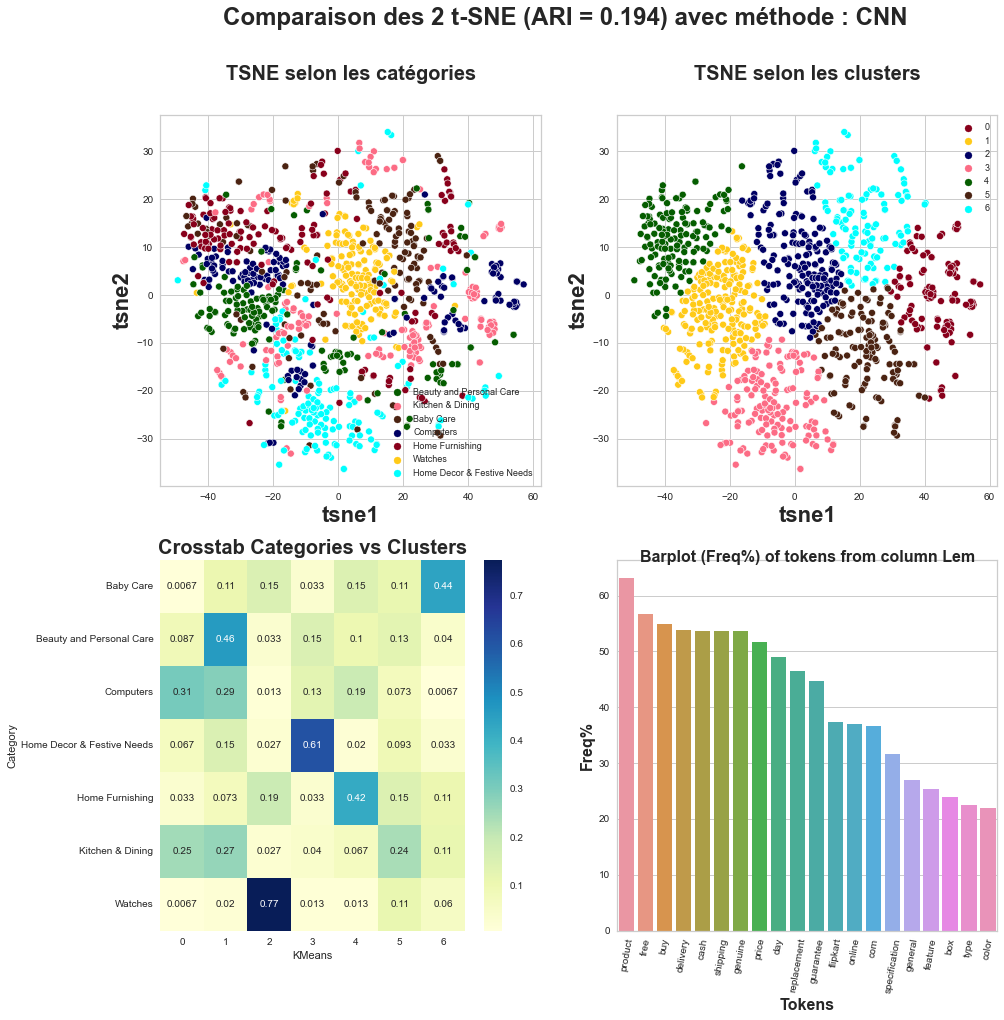

In [ ]:
big_fct3()